## Машинное обучение: задание 2

### 1 Теоретические задачи

#### 1.1 Ответы в листьях регрессионного дерева

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожида-
нию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки,
попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты
равновероятными)?



### 2 Применение решающего дерева

20% баллов за задание, оценочное время выполнения 30 минут + установка GraphViz

Постройте решающее дерево из sklearn на датасете german credit data из UCI репозитория
и визуализируйте его. Попробуйте проинтерпретировать первые несколько разбиений, изу-
чив описание признаков. Постройте графики зависимости качества на кросс-валидации и на
обучающей выборке от глубины дерева

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from IPython.display import Image
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import numpy as np
import pydotplus 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Подготавливаем данные

In [88]:
# данные взяты отсюда https://onlinecourses.science.psu.edu/stat857/node/215
data = pd.read_csv('data/german_credit_data/german_credit.csv')

In [89]:
credit_data = pd.DataFrame(data)
credit_data_features = credit_data.columns[1:]
X_data = credit_data.iloc[:, 1:]
y_data = credit_data.Creditability

#### Строим дерево

In [90]:
model = tree.DecisionTreeClassifier()
model.fit(X_data, y_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [91]:
dot_data = tree.export_graphviz(model, out_file="credit_tree.out", 
                         feature_names=credit_data_features,  
                         class_names=['Creditable', 'NonCreditable'],  
                         filled=True, rounded=True,  
                         special_characters=True)

In [92]:
graph = pydotplus.graphviz.graph_from_dot_file("credit_tree.out")  
Image(graph.create_png())

#### Попробуем уменьшить глубину дерева

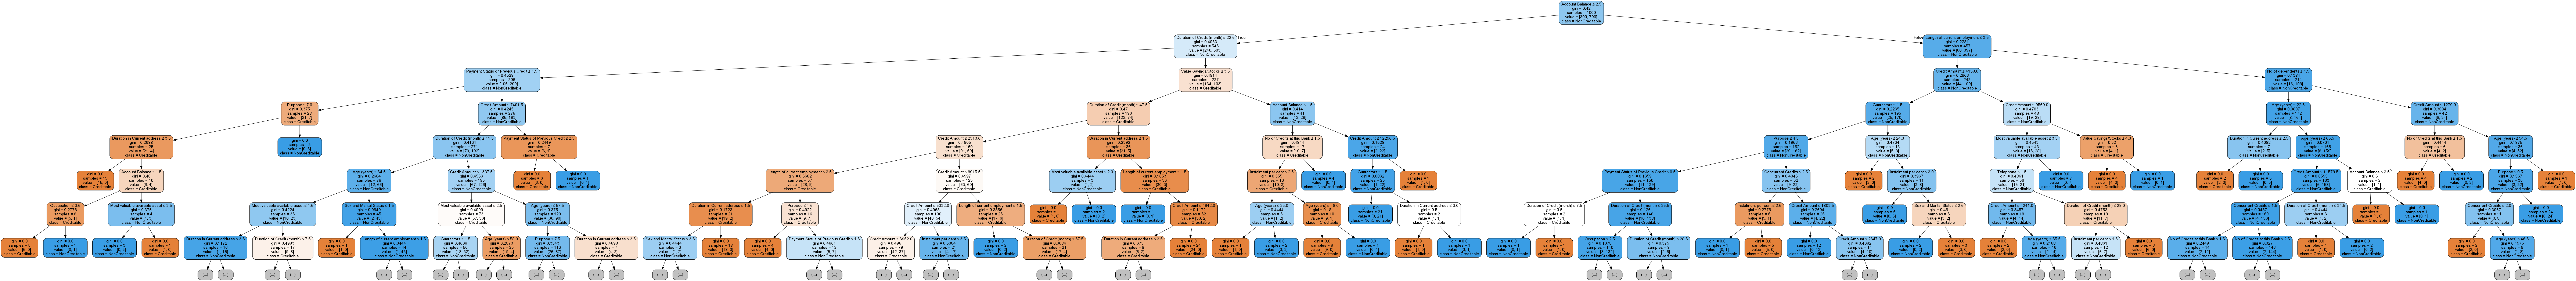

In [74]:
dot_data1 = tree.export_graphviz(model, out_file="credit_tree1.out", 
                         max_depth = 7,
                         feature_names=credit_data_features,  
                         class_names=['Creditable', 'NonCreditable'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph1 = pydotplus.graphviz.graph_from_dot_file("credit_tree1.out")  
Image(graph1.create_png())

#### Проверим качество алгоритма, построим графики зависимости качества на кросс-валидации и на обучающей выборке от глубины дерева

In [93]:
depth = np.arange(4, 20)

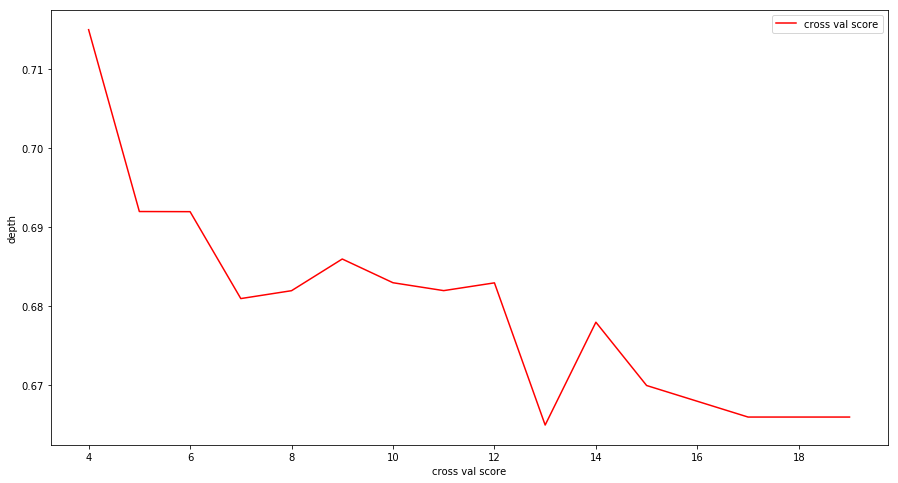

In [97]:
cross_val_scores = [cross_val_score(tree.DecisionTreeClassifier(random_state=0, max_depth=d), X_data, y_data).mean() for d in depth ]

plt.figure(figsize=(15, 8))
plt.plot(depth, cross_val_scores, color='red', label='cross val score')
plt.xlabel('cross val score')
plt.ylabel('depth')
plt.legend()
plt.show()

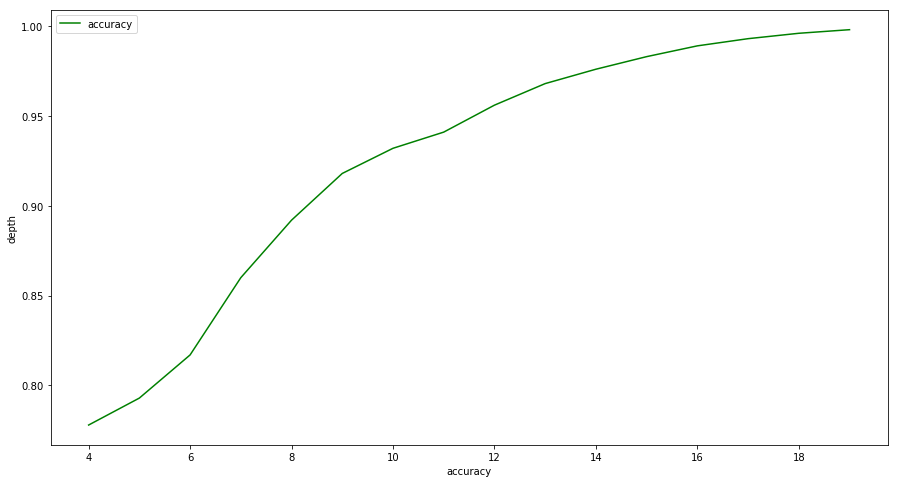

In [100]:
accuracy_scores = [accuracy_score(tree.DecisionTreeClassifier(random_state=0, max_depth=d).fit(X_data, y_data).predict(X_data), y_data) 
          for d in depth]

plt.figure(figsize=(15, 8))
plt.plot(depth, accuracy_scores, color='green', label='accuracy')
plt.xlabel('accuracy')
plt.ylabel('depth')
plt.legend()
plt.show()

### 3 Реализация решающего дерева (опциональная часть)

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
boston_data = pd.DataFrame(boston.data)
boston_data.columns = boston.feature_names
boston_data['target'] = boston.target

In [45]:
boston_data.head()
len(boston_data)

506

### Создаем решающее дерево стандартным жадным алгоритмом

In [8]:
class Node:
    def __init__(self):
         """
        поля          
        
        feature: string
            по какому признаку разделение в этой вершине
        
        threshold: int
            порог по этому признаку
            
        class: string
            если это лист, то к какому классу относятся объекты в листе
            
        left, right: Node
            левое и правое поддеревья
            
        num: int
            количество объектов, попавших в вершину
        """
        
        pass
        
    def set_left(L):
        self.left = L
    
    def set_right(R):
        self.right = R

In [11]:
class DecisionTree:
    def _init_(self, features, max_depth=None):
        """
                      
        root: Node
        
        max_depth: int
            максимальная глубина дерева
            
        features: np.array
            признаки 
            
        num_features: int
            количество признаков
        """
        
        self.max_depth = max_depth
        self.features = features
        self.num_features = len(features)
    
    # метод возвращает ссылку на корень дерева
    def builder(self, X_train, y_train, cur_vertex, cur_depth):
        
        
        # если в y_train один класс, то возвращаем лист
        if len(np.unique(y_train)) == 1:
            cur_vertex.class = y_train[0]
            return cur_vertex;
        
        size = len(y_train)
        answers = np.array(y_train)
        
        # находим наиболее информативное разбиение, пользуясь критерием gini
        max_gini = 0
        best_feat = 0
        best_thr = 0
        for feature self.features:
            
            # перебираем все значение признаков
            values = np.array(X_train[feature].T)
            thresholds = np.unique(values)
                        
            for thr in thresholds:
                
                gini = 0
                for i in range(0, size-1):
                    for j in range(0, size-1):
                        if (values[i] < thr and values[j] < thr and answers[i] == answers[j]):
                            gini += 1
                if (gini > max_gini):
                    max_gini = gini
                    best_feat = feature
                    best_thr = thr
                    
        # разбиваем выборку на две части с помощью найденного разбиения
        X_train0 = X_train[X_train[best_feat] < best_thr]
        X_train1 = X_train[X_train[best_feat] >= best_thr]
        
    def fit(self, X_train, y_train):
        
        self.root = builder(self, X_train, y_train, self.root, 0)
       
    

In [21]:
boston_sample = boston_data.sample(n = 20, random_state = 111)

CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
93    0.02875  28.0  15.04   0.0  0.4640  6.211   28.9  3.6659   4.0  270.0   
223   0.61470   0.0   6.20   0.0  0.5070  6.618   80.8  3.2721   8.0  307.0   
39    0.02763  75.0   2.95   0.0  0.4280  6.595   21.8  5.4011   3.0  252.0   
122   0.09299   0.0  25.65   0.0  0.5810  5.961   92.9  2.0869   2.0  188.0   
203   0.03510  95.0   2.68   0.0  0.4161  7.853   33.2  5.1180   4.0  224.0   
311   0.79041   0.0   9.90   0.0  0.5440  6.122   52.8  2.6403   4.0  304.0   
279   0.21038  20.0   3.33   0.0  0.4429  6.812   32.2  4.1007   5.0  216.0   
24    0.75026   0.0   8.14   0.0  0.5380  5.924   94.1  4.3996   4.0  307.0   
164   2.24236   0.0  19.58   0.0  0.6050  5.854   91.8  2.4220   5.0  403.0   
436  14.42080   0.0  18.10   0.0  0.7400  6.461   93.3  2.0026  24.0  666.0   
271   0.16211  20.0   6.96   0.0  0.4640  6.240   16.3  4.4290   3.0  223.0   
204   0.02009  95.0   2.68   0.0  0.4161  8.034   31.9  5.1180   4.0  224.0   
208   0.13587   0.0  10.59   1.0  0.4890  6.064   59.1  4.2392   4.0  277.0   
234   0.44791   0.0   6.20   1.0  0.5070  6.726   66.5  3.6519   8.0  307.0   
395   8.71675   0.0  18.10   0.0  0.6930  6.471   98.8  1.7257  24.0  666.0   
329   0.06724   0.0   3.24   0.0  0.4600  6.333   17.2  5.2146   4.0  430.0   
249   0.19073  22.0   5.86   0.0  0.4310  6.718   17.5  7.8265   7.0  330.0   
71    0.15876   0.0  10.81   0.0  0.4130  5.961   17.5  5.2873   4.0  305.0   
23    0.98843   0.0   8.14   0.0  0.5380  5.813  100.0  4.0952   4.0  307.0   
207   0.25199   0.0  10.59   0.0  0.4890  5.783   72.7  4.3549   4.0  277.0   

     PTRATIO       B  LSTAT  target  
93      18.2  396.33   6.21    25.0  
223     17.4  396.90   7.60    30.1  
39      18.3  395.63   4.32    30.8  
122     19.1  378.09  17.93    20.5  
203     14.7  392.78   3.81    48.5  
311     18.4  396.90   5.98    22.1  
279     14.9  396.90   4.85    35.1  
24      21.0  394.33  16.30    15.6  
164     14.7  395.11  11.64    22.7  
436     20.2   27.49  18.05     9.6  
271     18.6  396.90   6.59    25.2  
204     14.7  390.55   2.88    50.0  
208     18.6  381.32  14.66    24.4  
234     17.4  360.20   8.05    29.0  
395     20.2  391.98  17.12    13.1  
329     16.9  375.21   7.34    22.6  
249     19.1  393.74   6.56    26.2  
71      19.2  376.94   9.88    21.7  
23      21.0  394.54  19.88    14.5  
207     18.6  389.43  18.06    22.5

In [28]:
boston_sample.iloc[]

CRIM         0.6147
ZN           0.0000
INDUS        6.2000
CHAS         0.0000
NOX          0.5070
RM           6.6180
AGE         80.8000
DIS          3.2721
RAD          8.0000
TAX        307.0000
PTRATIO     17.4000
B          396.9000
LSTAT        7.6000
target      30.1000
Name: 223, dtype: float64

In [153]:
train_data, test_data, train_target, test_target = train_test_split(boston_data.iloc[:, :-1], boston_data.target,
                                                                   test_size = 0.9)

In [164]:
type(train_data)

pandas.core.frame.DataFrame

In [157]:
#train_data[['CRIM']].T[2]

In [159]:
values = train_data['CRIM'].T

#print train_data
#train_target = np.array(train_target)

In [160]:
max_gini = 0
best_feat = ''
best_thr = 0
size = len(train_target)
targets = np.array(train_target)
for feature in boston.feature_names:

    # перебираем все значение признаков
    values = np.array(train_data[feature].T) 
    thresholds = np.unique(values)
    
    
    for thr in thresholds:
        gini = 0
        for i in range(0, size-1):
            for j in range(0, size-1):
                if ((values[i] < thr) 
                    and (values[j] < thr) 
                    and (targets[i] == targets[j])):
                    gini += 1
        if (gini > max_gini):
            best_feat = feature
            best_thr = thr


In [167]:
train_data[train_data['AGE'] > 20]

CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
346   0.06162   0.0   4.39   0.0  0.4420  5.898   52.3  8.0136   3.0  352.0   
90    0.04684   0.0   3.41   0.0  0.4890  6.417   66.1  3.0923   2.0  270.0   
327   0.24103   0.0   7.38   0.0  0.4930  6.083   43.7  5.4159   5.0  287.0   
204   0.02009  95.0   2.68   0.0  0.4161  8.034   31.9  5.1180   4.0  224.0   
133   0.32982   0.0  21.89   0.0  0.6240  5.822   95.4  2.4699   4.0  437.0   
99    0.06860   0.0   2.89   0.0  0.4450  7.416   62.5  3.4952   2.0  276.0   
348   0.01501  80.0   2.01   0.0  0.4350  6.635   29.7  8.3440   4.0  280.0   
136   0.32264   0.0  21.89   0.0  0.6240  5.942   93.5  1.9669   4.0  437.0   
34    1.61282   0.0   8.14   0.0  0.5380  6.096   96.9  3.7598   4.0  307.0   
471   4.03841   0.0  18.10   0.0  0.5320  6.229   90.7  3.0993  24.0  666.0   
289   0.04297  52.5   5.32   0.0  0.4050  6.565   22.9  7.3172   6.0  293.0   
405  67.92080   0.0  18.10   0.0  0.6930  5.683  100.0  1.4254  24.0  666.0   
20    1.25179   0.0   8.14   0.0  0.5380  5.570   98.1  3.7979   4.0  307.0   
365   4.55587   0.0  18.10   0.0  0.7180  3.561   87.9  1.6132  24.0  666.0   
358   5.20177   0.0  18.10   1.0  0.7700  6.127   83.4  2.7227  24.0  666.0   
178   0.06642   0.0   4.05   0.0  0.5100  6.860   74.4  2.9153   5.0  296.0   
9     0.17004  12.5   7.87   0.0  0.5240  6.004   85.9  6.5921   5.0  311.0   
416  10.83420   0.0  18.10   0.0  0.6790  6.782   90.8  1.8195  24.0  666.0   
456   4.66883   0.0  18.10   0.0  0.7130  5.976   87.9  2.5806  24.0  666.0   
205   0.13642   0.0  10.59   0.0  0.4890  5.891   22.3  3.9454   4.0  277.0   
481   5.70818   0.0  18.10   0.0  0.5320  6.750   74.9  3.3317  24.0  666.0   
67    0.05789  12.5   6.07   0.0  0.4090  5.878   21.4  6.4980   4.0  345.0   
118   0.13058   0.0  10.01   0.0  0.5470  5.872   73.1  2.4775   6.0  432.0   
432   6.44405   0.0  18.10   0.0  0.5840  6.425   74.8  2.2004  24.0  666.0   
215   0.19802   0.0  10.59   0.0  0.4890  6.182   42.4  3.9454   4.0  277.0   
501   0.06263   0.0  11.93   0.0  0.5730  6.593   69.1  2.4786   1.0  273.0   
495   0.17899   0.0   9.69   0.0  0.5850  5.670   28.8  2.7986   6.0  391.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031   23.3  6.6407   1.0  304.0   
128   0.32543   0.0  21.89   0.0  0.6240  6.431   98.8  1.8125   4.0  437.0   
414  45.74610   0.0  18.10   0.0  0.6930  4.519  100.0  1.6582  24.0  666.0   
429   9.33889   0.0  18.10   0.0  0.6790  6.380   95.6  1.9682  24.0  666.0   
334   0.03738   0.0   5.19   0.0  0.5150  6.310   38.5  6.4584   5.0  224.0   
181   0.06888   0.0   2.46   0.0  0.4880  6.144   62.2  2.5979   3.0  193.0   
68    0.13554  12.5   6.07   0.0  0.4090  5.594   36.8  6.4980   4.0  345.0   
378  23.64820   0.0  18.10   0.0  0.6710  6.380   96.2  1.3861  24.0  666.0   
436  14.42080   0.0  18.10   0.0  0.7400  6.461   93.3  2.0026  24.0  666.0   
310   2.63548   0.0   9.90   0.0  0.5440  4.973   37.8  2.5194   4.0  304.0   
441   9.72418   0.0  18.10   0.0  0.7400  6.406   97.2  2.0651  24.0  666.0   
176   0.07022   0.0   4.05   0.0  0.5100  6.020   47.2  3.5549   5.0  296.0   
359   4.26131   0.0  18.10   0.0  0.7700  6.112   81.3  2.5091  24.0  666.0   
430   8.49213   0.0  18.10   0.0  0.5840  6.348   86.1  2.0527  24.0  666.0   

     PTRATIO       B  LSTAT  
346     18.8  364.61  12.67  
90      17.8  392.18   8.81  
327     19.6  396.90  12.79  
204     14.7  390.55   2.88  
133     21.2  388.69  15.03  
99      18.0  396.90   6.19  
348     17.0  390.94   5.99  
136     21.2  378.25  16.90  
34      21.0  248.31  20.34  
471     20.2  395.33  12.87  
289     16.6  371.72   9.51  
405     20.2  384.97  22.98  
20      21.0  376.57  21.02  
365     20.2  354.70   7.12  
358     20.2  395.43  11.48  
178     16.6  391.27   6.92  
9       15.2  386.71  17.10  
416     20.2   21.57  25.79  
456     20.2   10.48  19.01  
205     18.6  396.90  10.87  
481     20.2  393.07   7.74  
67      18.9  396.21   8.10  
